In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data

In [52]:
file_path = '/Users/muxin/PyCharm/mediapipe_hand_prediction/results/regional_occlusion/overall/'
cricual_points_path = '/Users/muxin/PyCharm/ASL/cricual_points.png'
df1 = pd.read_csv(f'{file_path}hand_recognition/regional_occlusion_results.csv')
baseline_1 = pd.read_csv('/Users/muxin/PyCharm/mediapipe_hand_prediction/results/baseline/overall/hand_recognition/naked_hands.csv')
df2 = pd.read_csv(f'{file_path}hand_landmark_localisation/regional_occlusion_results.csv')
baseline_2 = pd.read_csv('/Users/muxin/PyCharm/mediapipe_hand_prediction/results/baseline/overall/hand_landmark_localisation/naked_hands.csv')
titles = ['Hand recognition result', 'Hand landmark localisation result']

In [53]:
baseline_1 = baseline_1.rename({'occlusion_level': 'occlusion_type'}, axis=1)  
baseline_1['occlusion_type'] = baseline_1['occlusion_type'].replace(['level 0'], 'baseline')
baseline_2 = baseline_2.rename({'occlusion_level': 'occlusion_type'}, axis=1)  
baseline_2['occlusion_type'] = baseline_2['occlusion_type'].replace(['level 0'], 'baseline')

df1 = pd.concat([baseline_1, df1], ignore_index=True)
df2 = pd.concat([baseline_2, df2], ignore_index=True)
dfs = [df1, df2]

# Hand recognition analysis

In [54]:
dfs

[  occlusion_type  precision    recall  f1_score
 0       baseline   0.975899  0.953258  0.964446
 1          top_5   0.909857  0.490388  0.637293
 2       bottom_5   0.919494  0.639212  0.754153,
   occlusion_type  precision    recall  f1_score
 0       baseline   0.986910  0.953756  0.970050
 1          top_5   0.974554  0.507559  0.667485
 2       bottom_5   0.972803  0.652104  0.780806]

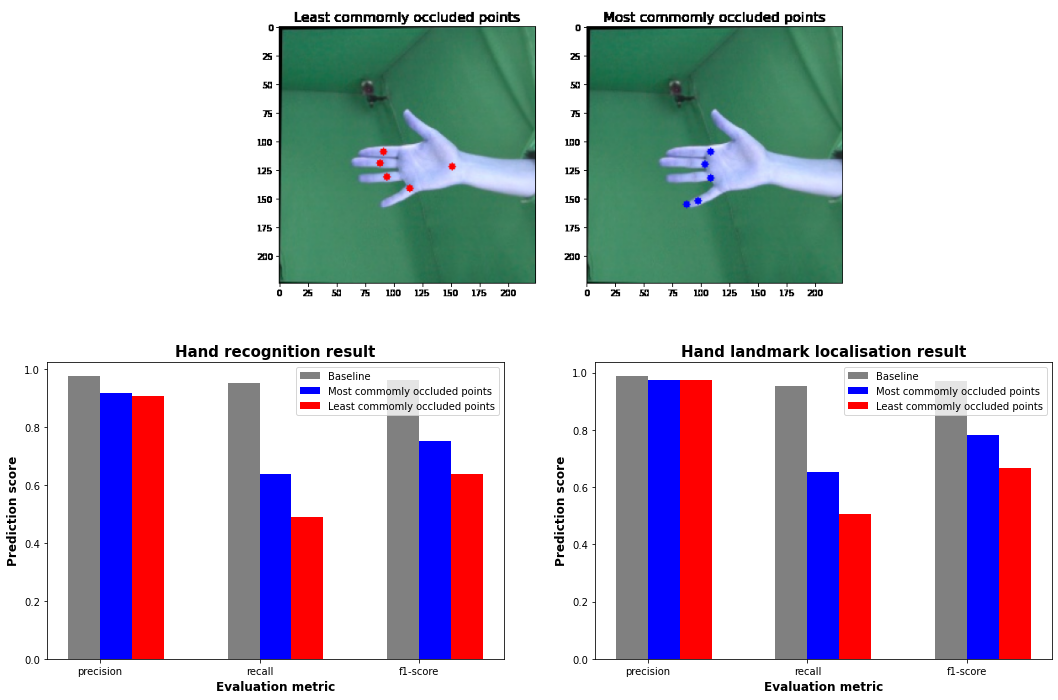

In [58]:
# Hand recognition analysis
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(18, 12))

# Set position of bar on X axis
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

for i in range(len(dfs)):
    # set height of bar
    baseline = list(dfs[i].loc[0])[1:]
    top_5 = list(dfs[i].loc[1])[1:]
    bottom_5 = list(dfs[i].loc[2])[1:]

    # Make the plot
    plt.subplot(2, 2, i+3) # row 1, col 2 index 1
    plt.bar(br1, baseline, color = 'grey', width = barWidth, label ='Baseline')
    plt.bar(br2, bottom_5, color = 'blue', width = barWidth, label ='Most commomly occluded points')
    plt.bar(br3, top_5, color ='red', width = barWidth, label ='Least commomly occluded points')

    # Adding Xticks
    plt.title(titles[i], fontweight ='bold', fontsize = 15)
    plt.xlabel('Evaluation metric', fontweight ='bold', fontsize = 12)
    plt.ylabel('Prediction score', fontweight ='bold', fontsize = 12)
    plt.xticks([r + 0.5*barWidth for r in range(len(top_5))],['precision', 'recall', 'f1-score'])
    plt.legend()
    
image = cv2.imread(cricual_points_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(2, 1, 1) # row 1, col 2 index 1
plt.axis('off')
plt.imshow(image)
plt.show()
# wrists are excluded 